<h1><center> Population -  A Curse or Boon ? </center></h1>

![title](population.jpg)

## Introduction
The dataset provided is related to population, which consists of various attributes. The attributes provided in the dataset are as follows:

<li>total count</li>
<li>total male</li>
<li>total female</li>
<li>literacy total population</li>
<li>male literacy</li>
<li>female literacy</li>
<li>total illiterate</li>
<li>male illiterate</li>
<li>female illiterate</li>
<li>Agriculture total population</li>
<li>Agriculture male population</li>
<li>total work population</li>
<li>male working pop</li>
<li>female working pop</li>
<li>non-work total pop</li>
<li>non-work male</li>
<li>non-work female</li>


###### The idea here is basically to come up with a prediction which can predict the next 5 years data given the given the above information for years 2001-2015


## Insights from analysis
This report represents our analysis for the given dataset.There seems to be an inherent error in the dataset provided. The data repeats itself for a given name (which is either a state / city / district...) over the years. We see that only for years 2001 and 2011, the data seems to be different, which is the way it should have been.However, all the other years data for a given name is repeating. This does not help us anyway in the prediction since even by a plain visual sight, we just see couple of values and a linear relationship getting established.

Need a good dataset to be actually helping in the analysis / predction.

What we have done is irrespective of the dataset, a model has been developed. The idea is - with a good dataset (howevever, the attributes should remain the same), the same model is going to work just fine. Hyperparameter tuning might be required to increase the accruacy levels. For now, that is not required. Hyperparameter tuning can be the next step forward.

Due to the inherent issues with the dataset, at the moment, no meaningful conclusions can be drawn.

## Data Analysis

#### Performing the necessary imports for data analysis

In [118]:
# importing pandas for data manupulation
import pandas as pd 

# import seaborn and plotly for  data visualization and google maps widget
import seaborn as sns
import matplotlib.pyplot as plt

# Import Random Forest for creating model
from sklearn.ensemble import RandomForestRegressor

# Import r2 score to check the accuracy
from sklearn.metrics import r2_score



# Importing the dataset

In [119]:
# import the dataset to dataframe df
# Please ensure to specify the path of the dataset accurately before proceeding further
df=pd.read_csv("F:\IndPop.csv")

#display the top 5 rows
df.head()

,Name,Year,TOT_P,TOT_M,TOT_F,P_LIT,M_LIT,F_LIT,P_ILL,M_ILL,F_ILL,MAIN_AL_P,MAIN_AL_M,MAIN_AL_F,TOT_WORK_P,TOT_WORK_M,TOT_WORK_F,NON_WORK_P,NON_WORK_M,NON_WORK_F
0,WEST BENGAL,2001,80176197.0,3037582.0,38710212.0,47196401.0,27452426.0,19743975.0,32979796.0,14013559.0,18966237.0,4522934.0,3744905.0,778029.0,29481690.0,22388044.0,7093646.0,50694507.0,19077941.0,31616566.0
1,UTTARANCHAL,2001,8489349.0,3290586.0,4163425.0,5105782.0,3008875.0,2096907.0,3383567.0,1317049.0,2066518.0,142624.0,122799.0,19825.0,3134036.0,1996177.0,1137859.0,5355313.0,2329747.0,3025566.0
2,UTTAR PRADESH,2001,166197921.0,3473428.0,78632552.0,75719284.0,48901413.0,26817871.0,90478637.0,38663956.0,51814681.0,5956547.0,4816377.0,1140170.0,53983824.0,40981558.0,13002266.0,112214097.0,46583811.0,65630286.0
3,TRIPURA,2001,3199203.0,1202030.0,1556978.0,2022099.0,1150707.0,871392.0,1177104.0,491518.0,685586.0,168519.0,127177.0,41342.0,1159561.0,831346.0,328215.0,2039642.0,810879.0,1228763.0
4,TAMIL NADU,2001,62405679.0,697078.0,31004770.0,40524545.0,22809662.0,17714883.0,21881134.0,8591247.0,13289887.0,6062786.0,3273642.0,2789144.0,27878282.0,18100397.0,9777885.0,34527397.0,13300512.0,21226885.0


# Preprocessing of dataset

In [120]:
# checking the size(rows and columns) in the given dataset
df.shape

(21182, 20)

In [121]:
# Remove the duplicates because the entire row is duplicated
df=df.drop_duplicates()

In [122]:
# checking the size after removing duplicate rows in the dataset
df.shape

(18510, 20)

In [123]:
#droping the null values in dataset since the size of nan(not a number) is small
df=df.dropna()

In [124]:
# checking the size after removing nan rows.Dicsion is taken to remove nan values since imputing with a central tendency 
# measure is not the right thing to do for this dataset 
df.shape

(17101, 20)

In [125]:
# List of unique city in the dataset
locationName=df.Name.unique()

# list of unique year in the dataset
yearSet=df.Year.unique()

In [136]:
# Create a new dataframe
inputDataset=pd.DataFrame()
tempData=pd.DataFrame()

# Removing the inconsistencies in dataset
for location in locationName:
    for thatYear in yearSet:
        tempData=df.loc[(df["Name"]==location) & (df["Year"]==thatYear)]
        if len(tempData)>1:
            if  (location!="Raigarh" and thatYear!="2001"):

                tempData=tempData.loc[tempData.index[0]][2:]+tempData.loc[tempData.index[1]][2:]
                tempData=pd.DataFrame(tempData).T
                tempData.insert(0,"Name",location)
                tempData.insert(1,"Year",thatYear)
                inputDataset=inputDataset.append(tempData)


In [142]:
inputDataset.reset_index()

,index,Name,Year,TOT_P,TOT_M,TOT_F,P_LIT,M_LIT,F_LIT,P_ILL,...,F_ILL,MAIN_AL_P,MAIN_AL_M,MAIN_AL_F,TOT_WORK_P,TOT_WORK_M,TOT_WORK_F,NON_WORK_P,NON_WORK_M,NON_WORK_F
0,0,WEST BENGAL,2002,8.01762e+07,4.1466e+07,3.87102e+07,4.71964e+07,2.74524e+07,1.9744e+07,3.29798e+07,...,1.89662e+07,2.94817e+07,2.2388e+07,7.09365e+06,4.52293e+06,3.74490e+06,778029,5.06945e+07,1.90779e+07,3.16166e+07
1,0,WEST BENGAL,2003,8.01762e+07,4.1466e+07,3.87102e+07,4.71964e+07,2.74524e+07,1.9744e+07,3.29798e+07,...,1.89662e+07,2.94817e+07,2.2388e+07,7.09365e+06,4.52293e+06,3.74490e+06,778029,5.06945e+07,1.90779e+07,3.16166e+07
2,0,WEST BENGAL,2004,8.01762e+07,4.1466e+07,3.87102e+07,4.71964e+07,2.74524e+07,1.9744e+07,3.29798e+07,...,1.89662e+07,2.94817e+07,2.2388e+07,7.09365e+06,4.52293e+06,3.74490e+06,778029,5.06945e+07,1.90779e+07,3.16166e+07
3,0,WEST BENGAL,2005,8.01762e+07,4.1466e+07,3.87102e+07,4.71964e+07,2.74524e+07,1.9744e+07,3.29798e+07,...,1.89662e+07,2.94817e+07,2.2388e+07,7.09365e+06,4.52293e+06,3.74490e+06,778029,5.06945e+07,1.90779e+07,3.16166e+07
4,0,WEST BENGAL,2006,8.01762e+07,4.1466e+07,3.87102e+07,4.71964e+07,2.74524e+07,1.9744e+07,3.29798e+07,...,1.89662e+07,2.94817e+07,2.2388e+07,7.09365e+06,4.52293e+06,3.74490e+06,778029,5.06945e+07,1.90779e+07,3.16166e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7944,0,Anand,2015,2.09274e+06,1.08722e+06,1.00552e+06,1.55125e+06,874481,676772,541492,...,328749,844794,627561,217233,263622,207235,56387,1.24795e+06,459663,788288
7945,0,Amritsar,2012,2.49066e+06,1.31841e+06,1.17225e+06,1.68477e+06,932981,751789,805886,...,420459,917856,735195,182661,91248,76076,15172,1.5728e+06,583213,989587
7946,0,Amritsar,2013,2.49066e+06,1.31841e+06,1.17225e+06,1.68477e+06,932981,751789,805886,...,420459,917856,735195,182661,91248,76076,15172,1.5728e+06,583213,989587
7947,0,Amritsar,2014,2.49066e+06,1.31841e+06,1.17225e+06,1.68477e+06,932981,751789,805886,...,420459,917856,735195,182661,91248,76076,15172,1.5728e+06,583213,989587


## Visualization 

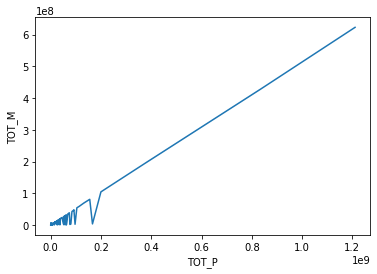

In [150]:
# Sample visualisation only for demonstration purpose using seaborn library
# There is high correlation between total population and total female population
sns.lineplot(data=df,x="TOT_P",y="TOT_M")

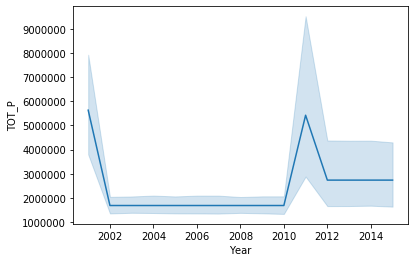

In [148]:
# Plot of total population with year
# The popoulation increases with time and same again so
sns.lineplot(data=df,x="Year",y="TOT_P")

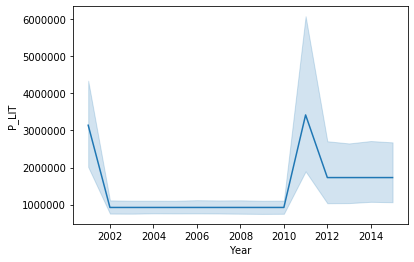

In [149]:
# Plot of total population with literacy
# Literacy increases with the time
sns.lineplot(data=df,x="Year",y="P_LIT")
y=df["TOT_P"]
x=df[["Name","Year"]]

In [84]:
# Preparing the datset in such a way that it is good to load into our machine learning algorithm
#   One Hot Enconding Categorical variables
# from sklearn.preprocessing import OneHotEncoder
# encodr=OneHotEncoder(categorical_features=[0])
# X and Y variable

y=df["TOT_P"]
x=df[["Name","Year"]]


# xa=encodr.fit_transform(x).toarray()
# This helps in convering categoriacl variables into numbers
x=pd.get_dummies(x)

In [85]:
x.head()

,Year,Name_ANDAMAN & NICOBAR ISLANDS,Name_ANDHRA PRADESH,Name_ARUNACHAL PRADESH,Name_ASSAM,Name_Adilabad,Name_Agra,Name_Ahmadabad,Name_Ahmadnagar,Name_Aizawl,...,Name_West Siang,Name_West Tripura,Name_West Tripura,Name_Wokha,Name_Y.S.R.,Name_Yadgir,Name_Yamunanagar,Name_Yanam,Name_Yavatmal,Name_Zunheboto
0,2001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
x.shape

(17101, 741)

In [87]:
# dividing  into training and test set 
x_train=x.loc[:18041]
x_test=x.loc[18040:]

In [88]:
y_train=y.loc[:18041]
y_test=y.loc[18040:]
x_test.shape

(2646, 741)

# Model Creation

In [94]:
# model 
model=RandomForestRegressor()

# Fit the dataset
mo=model.fit(x_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [95]:
# predicting y test
y_pred=mo.predict(x_test)

In [100]:
# the accuracy of the model using r2 score
accuracy=r2_score(y_test,y_pred)
accuracy

0.867086325487673